# Walmart: Data Cleaning and Wrangling

***
### 1.0 Import Libaries
- pandas -> Manipulation and handling of missing data
- numpy -> Perform numerical operations and calculations
- matplolib.pyplot -> Create graphs/ charts for exploratory analysis
- seaborn -> To create visualizations

In [25]:
# Import the following libaries and give them aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***
### 2.0 Data Loading and Exploration


In [26]:
# Loading the data into a dataframe
df = pd.read_csv(r'D:\Portfolio\walmart sales\walmart_sales.csv')

In [27]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


***
### 3.0 Handling Null and Missing Values

#### 3.1 Null Values Check
Here I use isnull.sum() to check for total number of null values and isnull.any() to filter out any null values, a null value would return as True.


In [28]:
# Checking for null values
# Dataset does not contain any null values
df.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [29]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

##### Null Values Check:
- Dataset does not contain any null values
- No further handling/ imputation is required


***
#### 3.2 Duplicate Values Check
Here, duplicated.any() is used to return a boolean value if there are any duplicate rows.


In [30]:
# Checking for duplicates
# Dataset does not contain duplicates, no removal/ imputation required
df.duplicated().sum()

0

In [31]:
df.duplicated().any()

False

In [32]:
# Dataset observation
# There are 6435 rows and 8 columns in the dataset 
# Columns 'Store' and 'Holiday_Flag' are of integer data type
# Date is of object data type which will be converted to datetime format for further analysis
# All other columns are of float data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [43]:
# Converting 'Date' column to datetime format to enable time-based analysis
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True, errors = 'coerce')
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

In [44]:
# Verifying conversion
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [45]:
# Extracting day, month and year from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [46]:
# Outlier Detection - IQR Method
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}

for col in num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_rows = df[(df[col] < lower) | (df[col] > upper)]

    outliers[col] = {
        "Number of Outliers": outlier_rows.shape[0],
        "Percentage": round(100 * outlier_rows.shape[0] / df.shape[0], 2)
    }

pd.DataFrame(outliers).T.sort_values(by="Number of Outliers", ascending=False)

,Number of Outliers,Percentage
Unemployment,481.0,7.47
Holiday_Flag,450.0,6.99
Weekly_Sales,34.0,0.53
Temperature,3.0,0.05
Store,0.0,0.00
Fuel_Price,0.0,0.00
CPI,0.0,0.00


In [47]:
# Statistical Summary of the dataset
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019


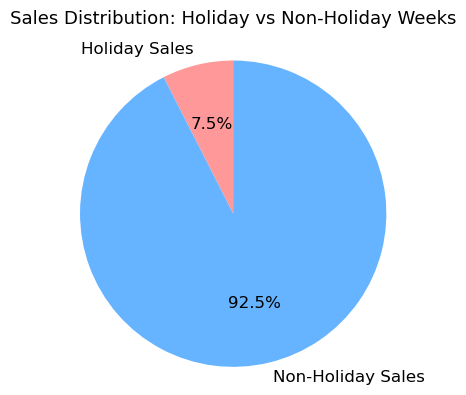

Distribution of total holiday sales is 7.50%
Distribution of total non-holiday sales is 92.50%


In [48]:
# Sales Distribution: Holiday vs Non-Holiday
holiday_sales_total = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
non_holiday_sales_total = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()

# Percentage distribution: Holiday
holiday_percentage = (holiday_sales_total / (holiday_sales_total + non_holiday_sales_total)) * 100

# Percentage distribution: Non-Holiday
non_holiday_percentage = (non_holiday_sales_total / (holiday_sales_total + non_holiday_sales_total)) * 100

# Plotting pie chart
pie_data = [holiday_sales_total, non_holiday_sales_total]
labels = ['Holiday Sales', 'Non-Holiday Sales']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(4, 4))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Sales Distribution: Holiday vs Non-Holiday Weeks', fontsize=13, pad=20)
plt.axis('equal')  # Keeps it a perfect circle
plt.tight_layout()
plt.show()


print(f"Distribution of total holiday sales is {holiday_percentage:.2f}%")
print(f"Distribution of total non-holiday sales is {non_holiday_percentage:.2f}%")

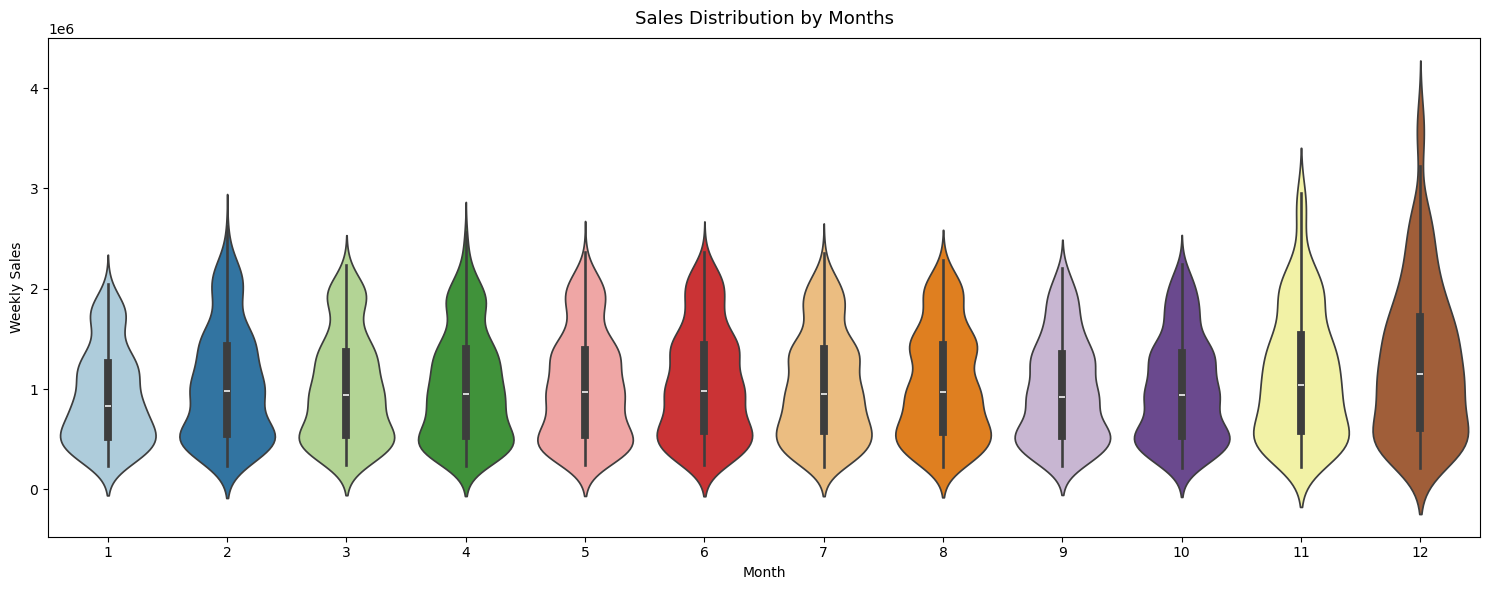

In [49]:
# Sales Distribution: Months
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x='month', y='Weekly_Sales', palette="Paired", hue='month', legend=False)
plt.title("Sales Distribution by Months", fontsize=13, pad=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Weekly Sales', fontsize=10)
plt.tight_layout()
plt.show()

In [50]:
# Correlation between all numerical values
df_01 = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI','Unemployment','day', 'month', 'year']]
df_01.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176,-0.017409,0.076143,-0.018378
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960,0.044526,0.122996,-0.056783
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158,0.026973,0.235862,0.064269
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684,0.028073,-0.042156,0.779470
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020,0.002684,0.004980,0.074796
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000,-0.004233,-0.012746,-0.241813
day,-0.017409,0.044526,0.026973,0.028073,0.002684,-0.004233,1.000000,0.015192,0.006406
month,0.076143,0.122996,0.235862,-0.042156,0.004980,-0.012746,0.015192,1.000000,-0.194465
year,-0.018378,-0.056783,0.064269,0.779470,0.074796,-0.241813,0.006406,-0.194465,1.000000


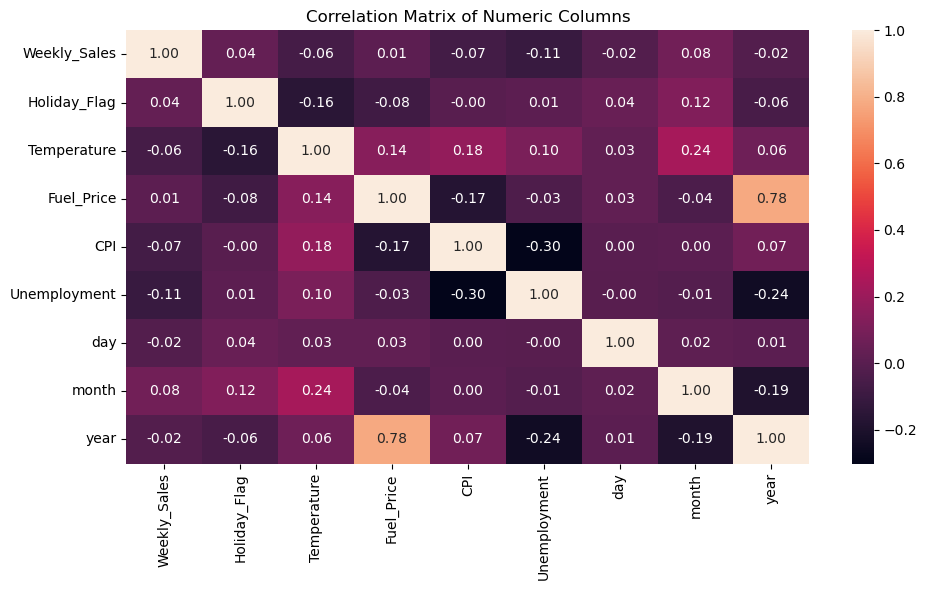

In [51]:
axis_corr = df_01.corr()
plt.figure(figsize=(10,6))
sns.heatmap(axis_corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()

In [53]:
# Export cleaned dataset as csv for SQL and Power BI stages
df.to_csv("walmart_analytics.csv", index=False)